In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Exploratory Data Analysis

In [4]:
df.isnull().sum()   # no missing values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.duplicated().sum()   # no duplicates

0

<Axes: >

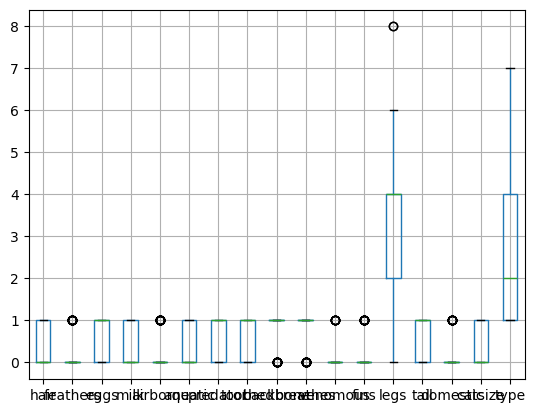

In [6]:
df.boxplot()   # outliers identified

In [7]:
def outliers(df,column):     # handling outliers using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for i in df.select_dtypes(include=['float','int']).columns:
    outliers(df,i)

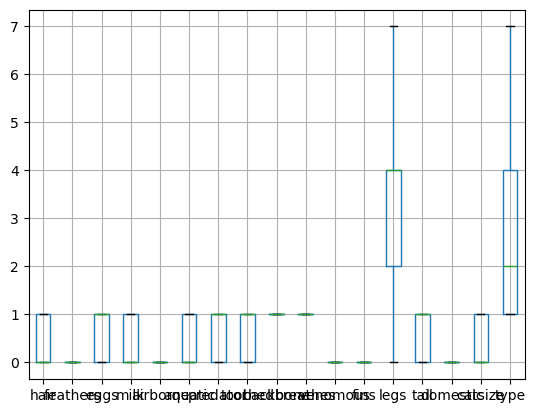

In [8]:
df.boxplot()   # outliers removed
plt.show()

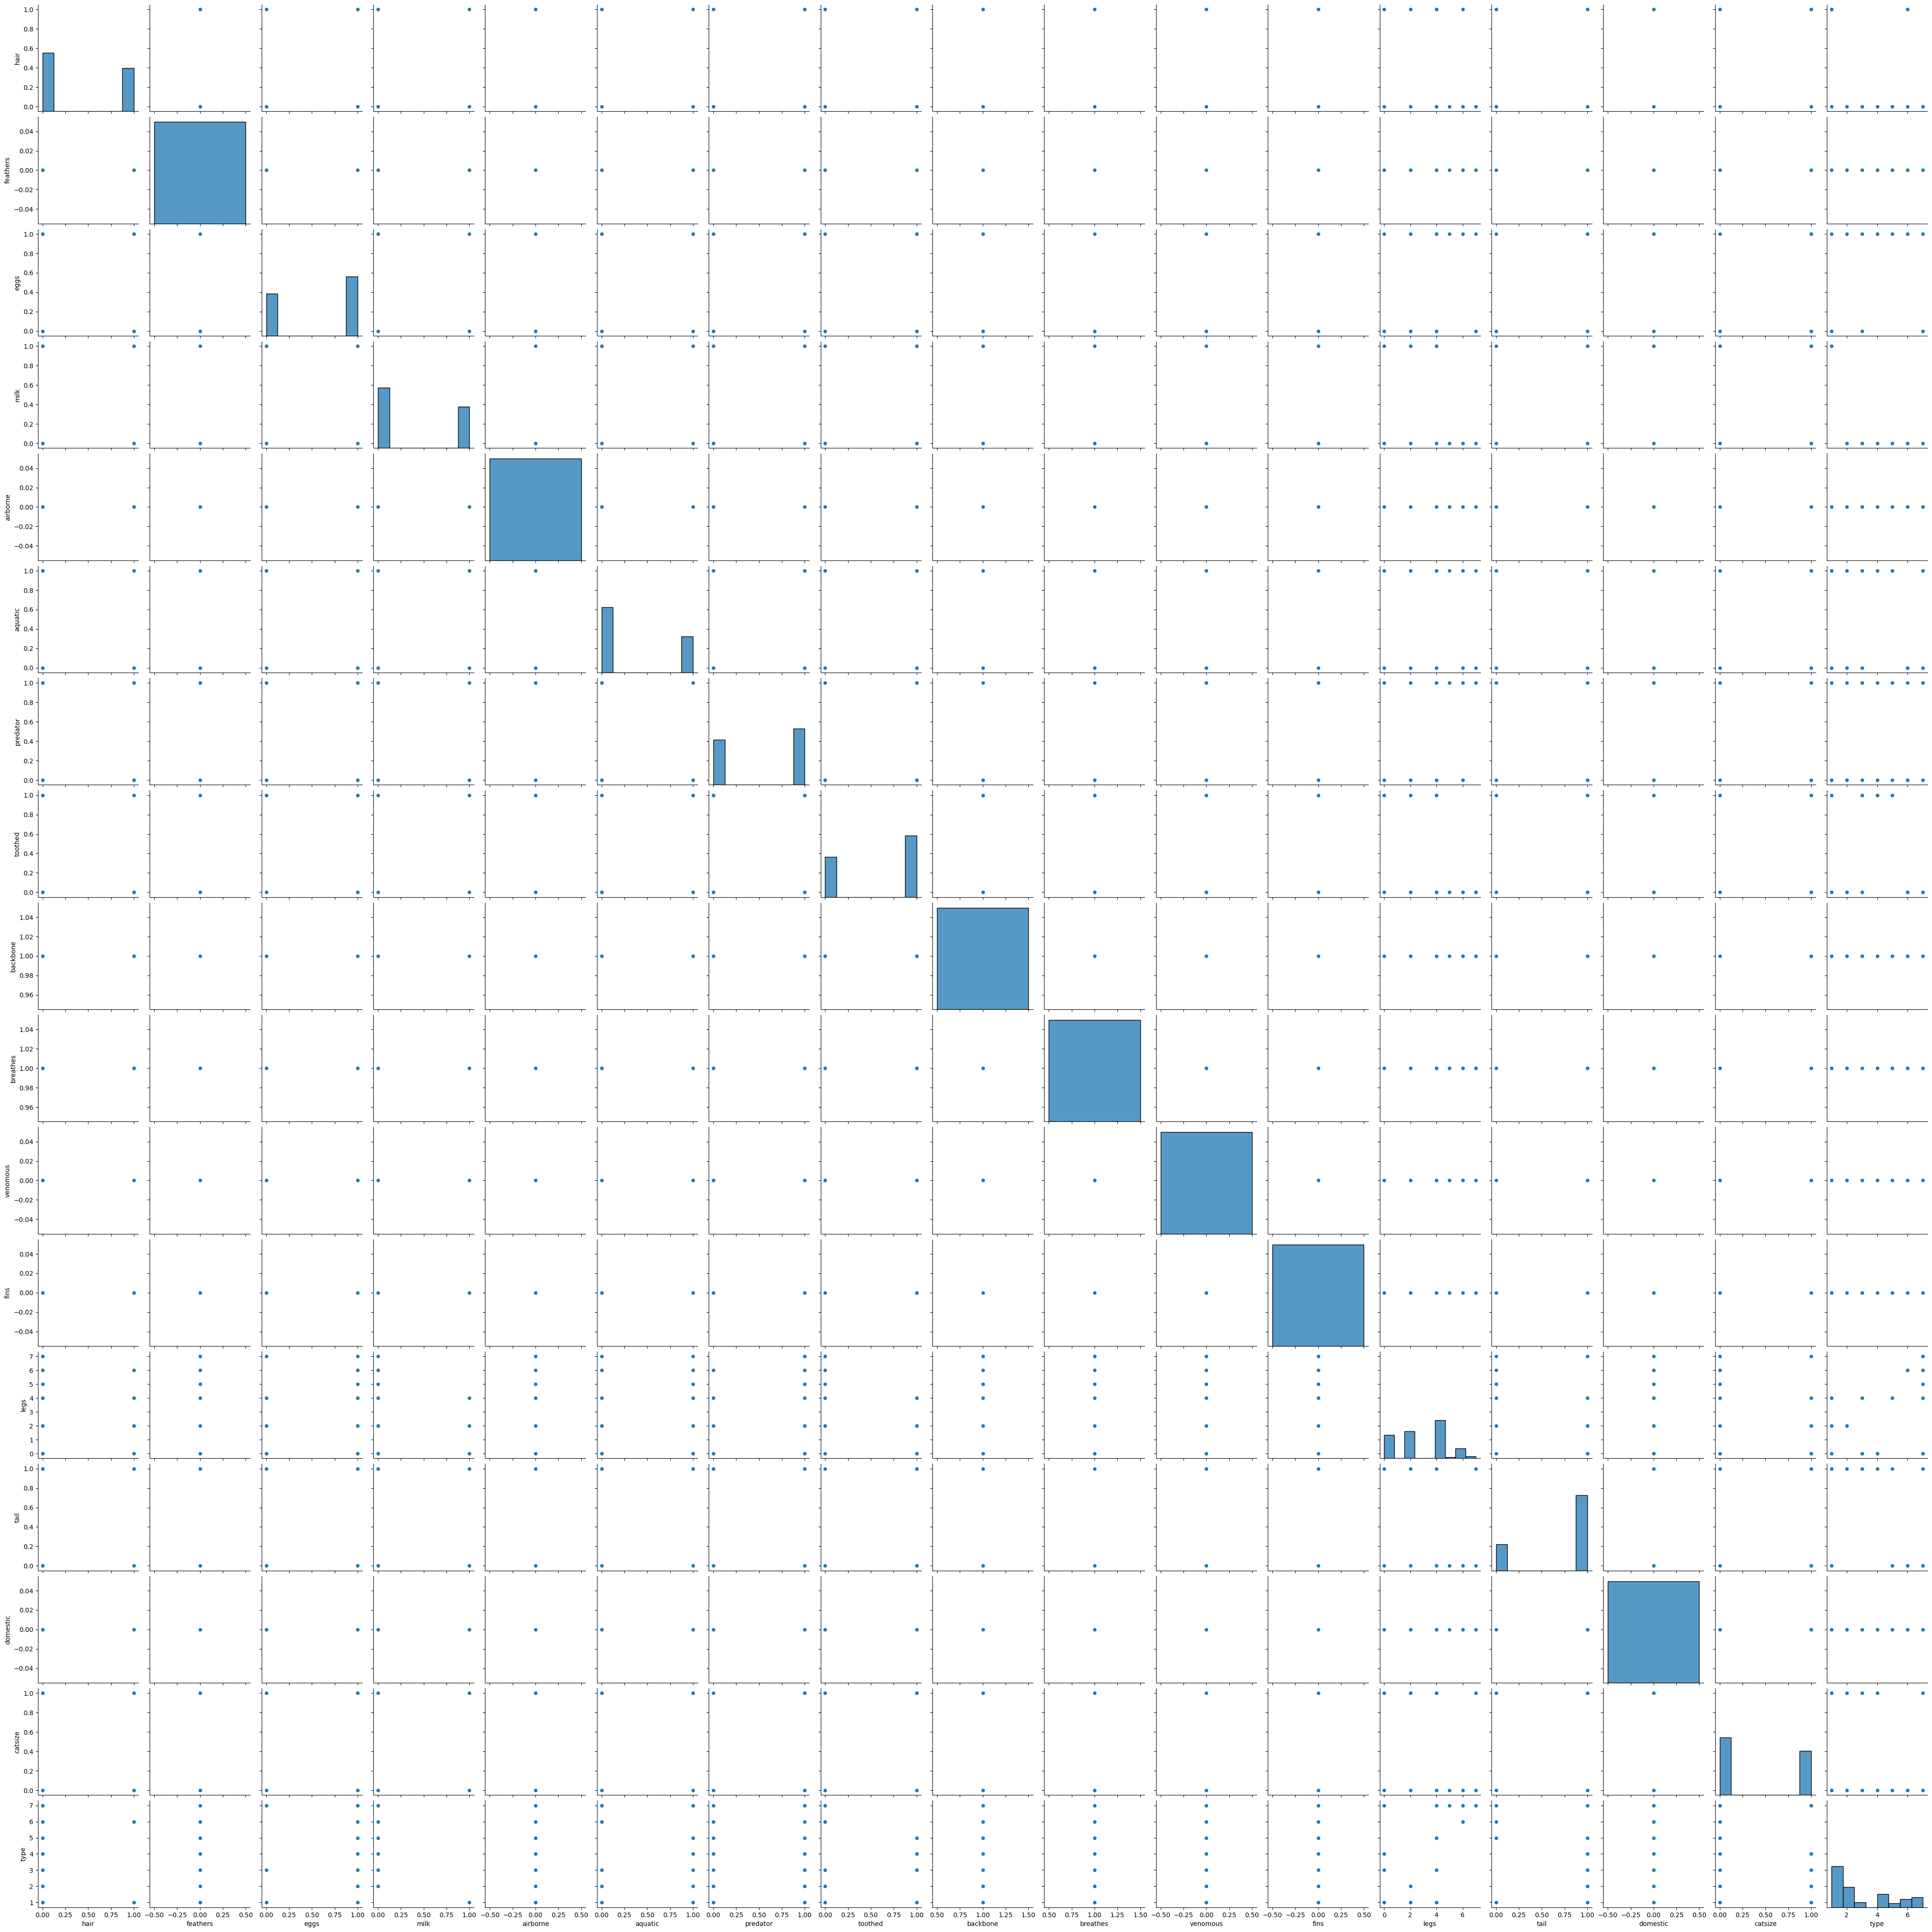

In [9]:
sns.pairplot(df)    # visualization
plt.show()

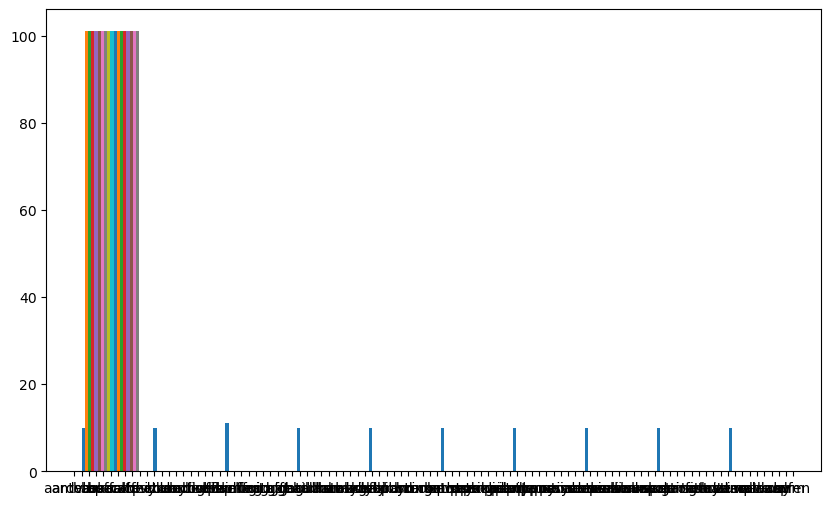

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df)
plt.show()

In [11]:
df_cleaned= df.drop(columns=['animal name'])  # dropping animal name column as its not needed for classification
df_cleaned.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0,4
3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1


In [12]:
x= df_cleaned.drop(columns=['type'])  # features
y= df_cleaned['type']   # type

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)  # splitting dataset

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


In [15]:
scaler= StandardScaler()

In [16]:
x_train_scaled= scaler.fit_transform(x_train)  # standardizing features
x_test_scaled= scaler.fit_transform(x_test)

## Training the KNN Model

In [18]:
knn= KNeighborsClassifier(n_neighbors=5)    # implementing KNN
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [19]:
y_pred= knn.predict(x_test_scaled)   # making predictions
y_pred

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [20]:
classification_report(y_test,y_pred)   # perforamance metrics

'              precision    recall  f1-score   support\n\n           1       1.00      0.92      0.96        12\n           2       1.00      1.00      1.00         2\n           3       0.00      0.00      0.00         1\n           4       0.50      1.00      0.67         2\n           6       1.00      1.00      1.00         3\n           7       1.00      1.00      1.00         1\n\n    accuracy                           0.90        21\n   macro avg       0.75      0.82      0.77        21\nweighted avg       0.90      0.90      0.90        21\n'

## Visualizations

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca= PCA(n_components=2)  # reducing dimensions to 2 using pca
x_train_pca= pca.fit_transform(x_train_scaled)
x_test_pca= pca.fit_transform(x_test_scaled)

In [24]:
knn_pca= KNeighborsClassifier(n_neighbors=3)   # training knn on reduced features
knn_pca.fit(x_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
x_min,x_max= x_train_pca[:,0].min()-1,x_train_pca[:,0].max()+1    # mesh grid
y_min,y_max= x_train_pca[:,1].min()-1,x_train_pca[:,1].max()+1
xx,yy= np.meshgrid(np.linspace(x_min,x_max,200),np.linspace(y_min,y_max,200))

In [26]:
z= knn_pca.predict(np.c_[xx.ravel(),yy.ravel()])   # predict on mesh grid
z= z.reshape(xx.shape)

In [27]:
from matplotlib.colors import ListedColormap

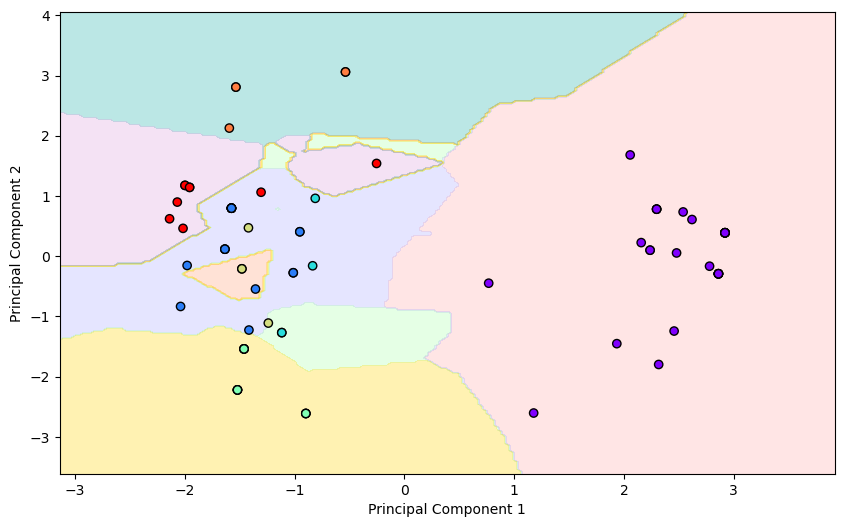

In [60]:
plt.figure(figsize=(10,6))   # plotting decision boundaries
cmap_light= ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD700', '#FFA07A', '#20B2AA', '#DDA0DD'])
plt.contourf(xx,yy,z,alpha=0.3,cmap=cmap_light)
scatter= plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,edgecolors='k',cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Interview Questions:

1. What are the key hyperparameters in KNN?

    The following are the hyperparameters in KNN
   - Number of Neighbours- Defines how many nearest points influence the prediction. Small k is more variance. large k is more bias.
   - Distance Metric - Determines how distance is measured. Euclidean is common for continuous data.
   - Weight Fuction - Defines how neighbours contribute to the prediction. Uniform and Distance-baded.
   - Algorithm - Chooses how neighbours are searched.  
Effect: Proper tuning balances accuracy, efficiency and generalization in KNN models.

2 What distance metrics can be used in KNN?  

Common Distance Metrics in KNN  
 1. Euclidean Distance : Measures straight-line distance between two points. Best for continuous numerical data.
 2. Manhattan Distance : Measures along grid-like paths. Suitable for high-dimensional or categorical data.
 3. Minkowski Distance : Generalized form of Euclidean and Manhattan distances. Controlled by parameter p
 4. Hamming Distance : Measures differences in categorical data. Counts the number of differing elements.
 5. Cosine Similarity : Measures the angle between vectors instead of absolute distance. useful for text and document similarity.